In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [103]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [104]:
df= pd.read_csv(r"C:\Users\danie\Desktop\Dan\Career Foundry\Achievement Six\Netflix Movies and Shows\imdb_movies_shows.csv2nd_prep_data.csv")

In [105]:
path = r"C:\Users\danie\Desktop\Dan\Career Foundry\Achievement Six\Netflix Movies and Shows\imdb_movies_shows.csv2nd_prep_data.csv"

In [106]:
df['seasons'] = df['seasons'].fillna(df['seasons'].median())

In [107]:
df['imdb_votes'] = df['imdb_votes'].fillna(df['imdb_votes'].median())

In [108]:
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].median())

In [109]:
# Create a subset excluding the "title", type, age_certification, genres, imdb_id, and "seasons" columns
sub = df[['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes']]

In [110]:
sub

,release_year,runtime,seasons,imdb_score,imdb_votes
0,1945,48,1.0,6.6,2471.0
1,1976,113,1.0,8.3,795222.0
2,1975,91,1.0,8.2,530877.0
3,1979,94,1.0,8.0,392419.0
4,1973,133,1.0,8.1,391942.0
...,...,...,...,...,...
5553,2021,107,1.0,2.2,950.0
5554,2021,24,1.0,6.6,2471.0
5555,2021,108,1.0,5.8,26.0
5556,2021,100,1.0,6.9,39.0


Eblow Technique

In [111]:
# the range of clusters in teh data
num_cl = range(1,10)

# define K-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [112]:
# Creates a score that represents the # a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\clust

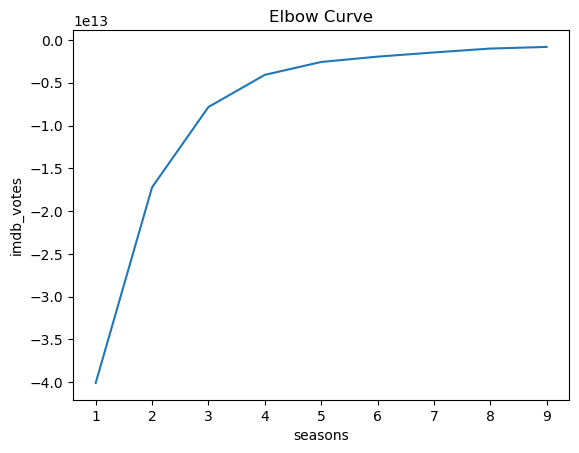

In [113]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('seasons')
pl.ylabel('imdb_votes')
pl.title('Elbow Curve')
pl.show()

There is a slight bend from 2-3 then another from 3-4 and then after 4-5 it starts to level out, so then would the optimal cluster be 4 or 5? Running with 4 below

In [125]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [126]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [127]:
df['clusters'] = kmeans.fit_predict(sub)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [128]:
sub.head()

,release_year,runtime,seasons,imdb_score,imdb_votes
0,1945,48,1.0,6.6,2471.0
1,1976,113,1.0,8.3,795222.0
2,1975,91,1.0,8.2,530877.0
3,1979,94,1.0,8.0,392419.0
4,1973,133,1.0,8.1,391942.0


In [129]:
df['clusters'].value_counts()

clusters
0    5238
2     260
1      55
3       5
Name: count, dtype: int64

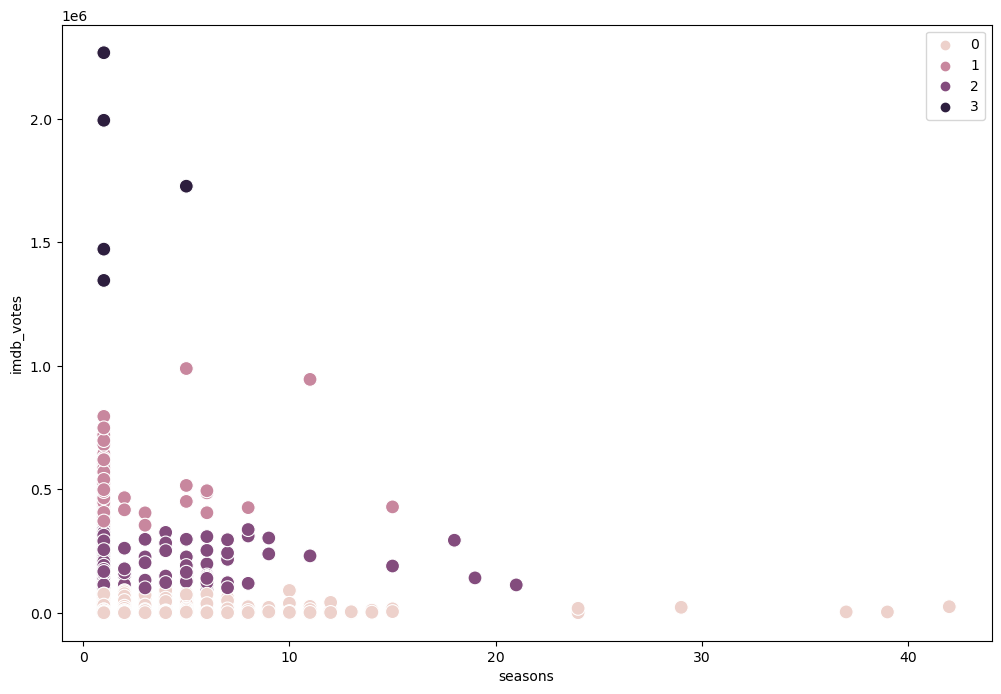

In [130]:
# Plot the clusters for the "Imdb_votes" and "seasons" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['seasons'], y=df['imdb_votes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('seasons') # Label x-axis.
plt.ylabel('imdb_votes') # Label y-axis.
plt.show()

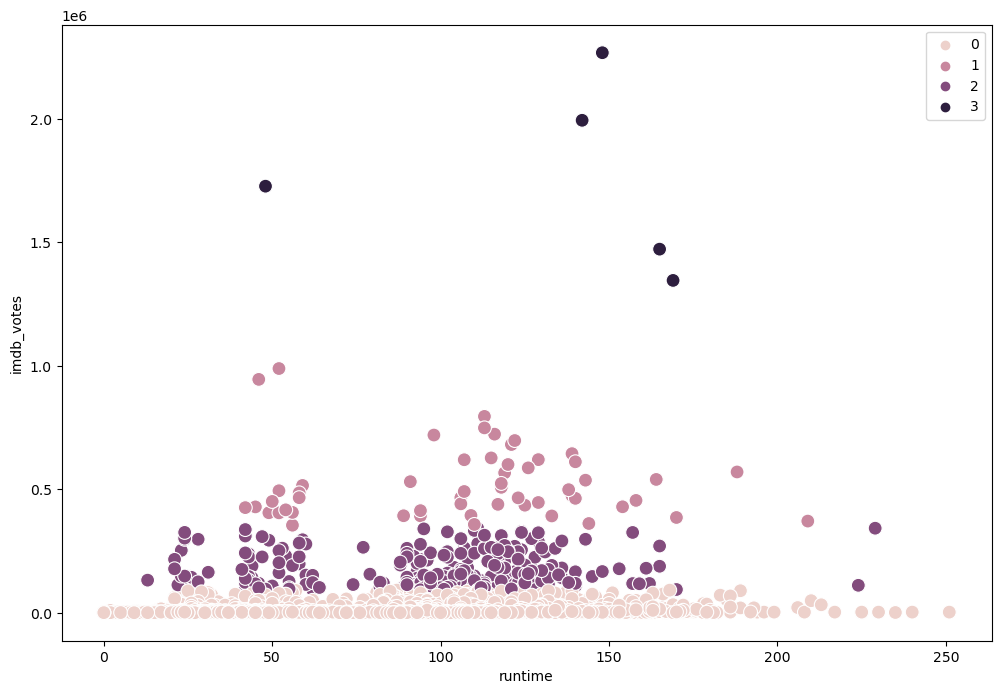

In [131]:
# Plot the clusters for the "release_year" and "imdb_votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['runtime'], y=df['imdb_votes'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('runtime') 
plt.ylabel('imdb_votes') 
plt.show()

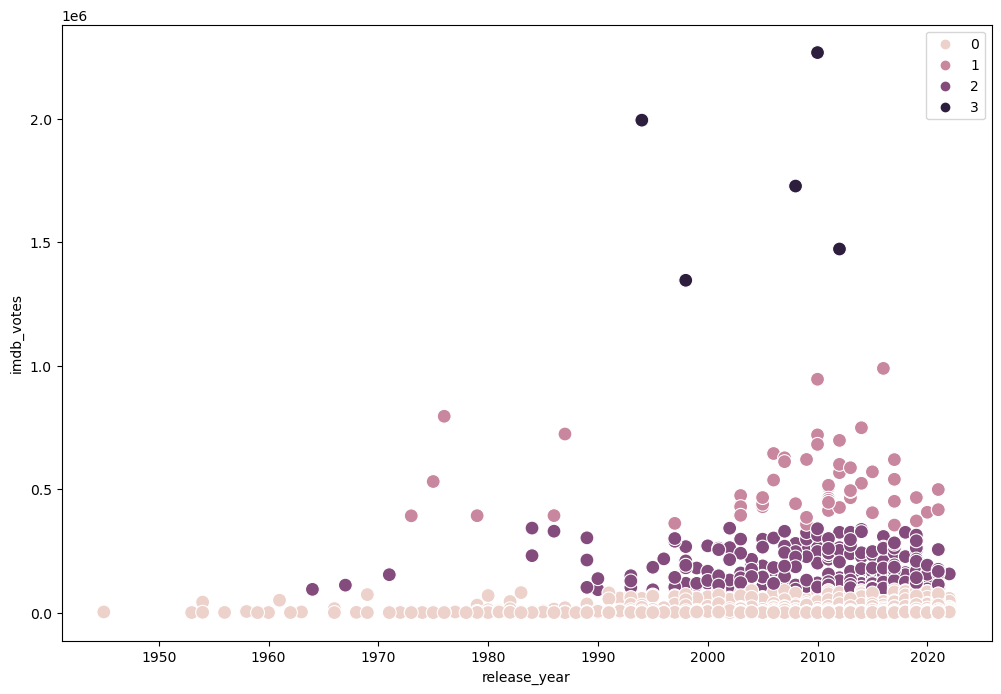

In [132]:
# Plot the clusters for the "release_year" and "imdb_votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['release_year'], y=df['imdb_votes'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('release_year') 
plt.ylabel('imdb_votes') 
plt.show()

The Seasons and Votes graph is almost identical to the scatterplots from previouys exercise. The 2nd graph of runtime and votes shows more of the clusters that I was expecting to see. The last graph is as I was expecting, but this I believe is due to not only movie releases but also technological advancements. More people are able to vote.

In [136]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark pruple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [137]:
df.groupby('cluster').agg({'imdb_score':['mean', 'median'], 
                         'runtime':['mean', 'median'], 
                         'seasons':['mean', 'median'],
                          'imdb_votes':['mean', 'median']})

imdb_score            runtime          seasons         \
                  mean median        mean median      mean median   
cluster                                                             
dark purple   7.182692   7.15   96.473077  104.0  2.038462    1.0   
pink          6.500649   6.60   77.168385   84.0  1.384689    1.0   
purple        7.896364   8.00  107.690909  115.0  2.163636    1.0   
red           8.820000   8.80  134.400000  148.0  1.800000    1.0   

               imdb_votes             
                     mean     median  
cluster                               
dark purple  1.761859e+05   151598.5  
pink         7.849133e+03     2471.0  
purple       5.200679e+05   474176.0  
red          1.761854e+06  1727694.0

In [138]:
df.to_csv(path+"2nd_prep_data.csv")